In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import base64, os
from io import BytesIO

In [3]:
# --- load data --- #
df = pd.read_csv("../data/milestone2/baseline_train.csv")
path_figures = "../figures/milestone2/feature_engineering/"
os.makedirs(path_figures, exist_ok=True)
df.head()

distance_from_net  shot_angle  empty_net  is_goal
0          12.206556   55.007980          0        0
1          53.000000   31.890792          0        0
2          38.948684   48.122130          0        0
3          27.658633   12.528808          0        0
4          67.230945   30.379126          0        0

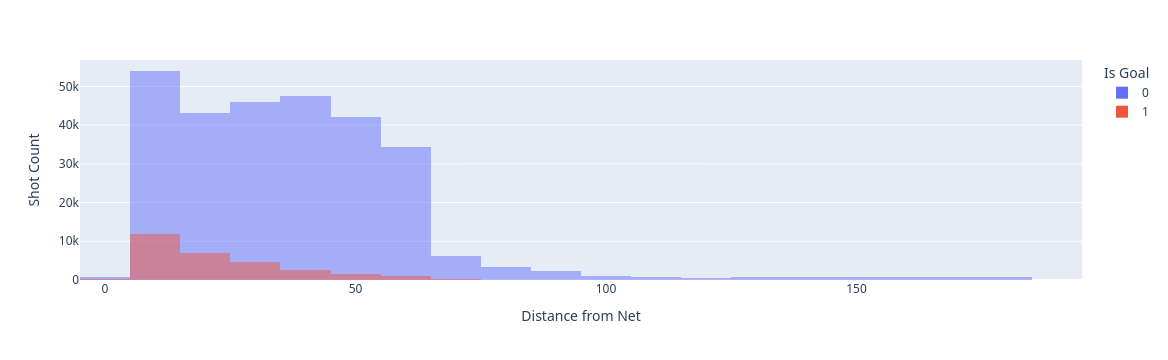

In [4]:
def distance_histograms(df, bins=30):
    fig = px.histogram(
        df,
        x="distance_from_net",
        color="is_goal",
        nbins=bins,
        barmode="overlay",  # overlay instead of stack
    )
    fig.update_layout(
        xaxis_title="Distance from Net",
        yaxis_title="Shot Count",
        legend_title_text="Is Goal"
    )
    html_path = os.path.join(path_figures, "distance_histogram.html")
    fig.write_html(html_path, include_plotlyjs="cdn", full_html=True)
    fig.show()
distance_histograms(df,30)

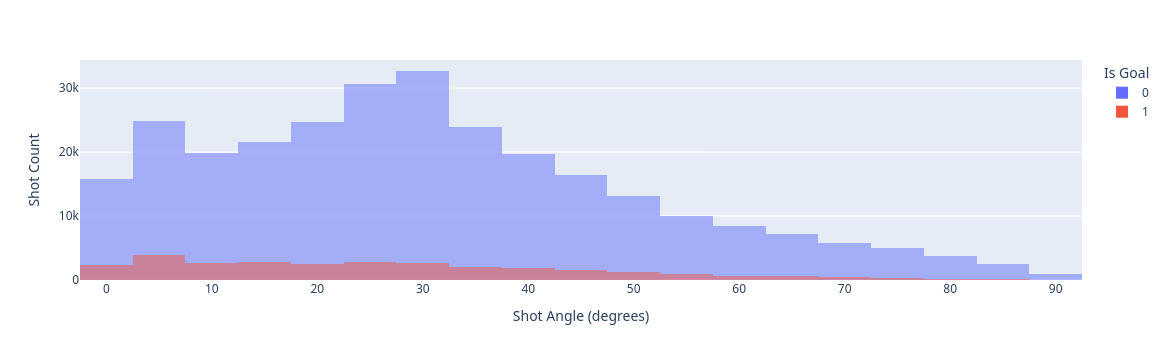

In [5]:
def angle_histogram(df, bins=30):
    fig = px.histogram(
        df,
        x="shot_angle",
        color="is_goal",
        nbins=bins,
        barmode="overlay",
    )
    fig.update_layout(
        xaxis_title="Shot Angle (degrees)",
        yaxis_title="Shot Count",
        legend_title_text="Is Goal"
    )
    html_path = os.path.join(path_figures, "angle_histogram.html")
    fig.write_html(html_path, include_plotlyjs="cdn", full_html=True)
    fig.show()
angle_histogram(df,30)

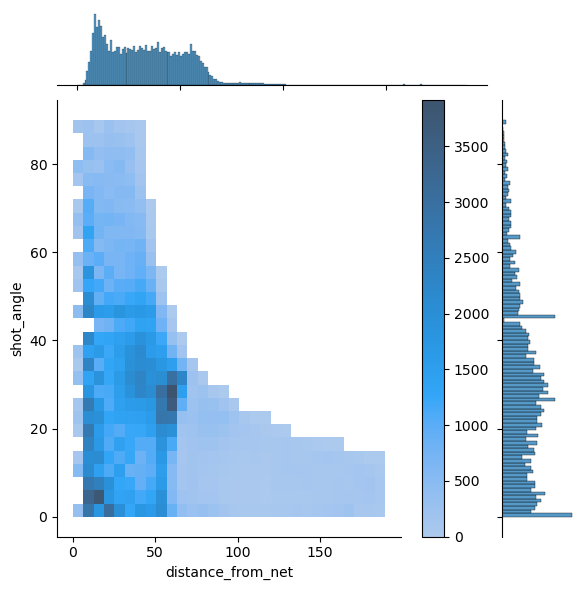

In [6]:
def distance_angle_histogram(df, bins=30):
    g = sns.jointplot(
        data=df,
        x="distance_from_net",
        y="shot_angle",
        kind="hist",
        bins=bins,
        cbar=True
    )
    plt.show()
    buffer = BytesIO()
    g.fig.savefig(buffer, format="png", bbox_inches="tight")
    buffer.seek(0)
    img_base64 = base64.b64encode(buffer.read()).decode("utf-8")
    html_path = os.path.join(path_figures, "distance_angle_histogram.html")
    with open(html_path, "w") as f:
        f.write(f'<img src="data:image/png;base64,{img_base64}">')
    plt.close(g.fig)
distance_angle_histogram(df,30)

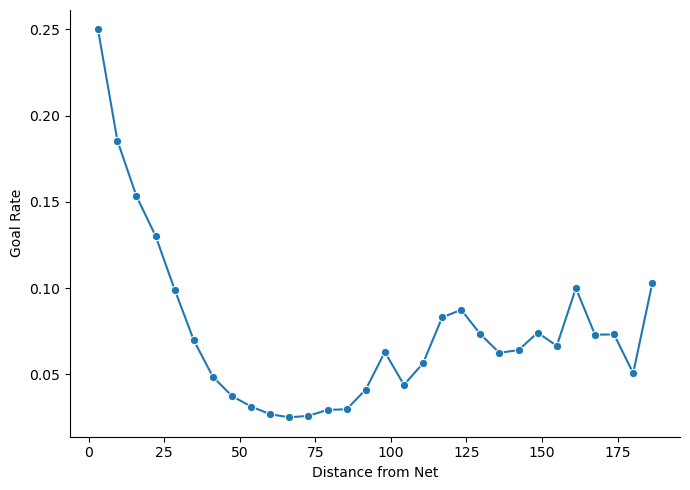

In [7]:
def goalrate_distance(df, bins=30):
    df["distance_bin"] = pd.cut(df["distance_from_net"], bins=bins)
    goal_rate = (
        df.groupby("distance_bin", observed=False)["is_goal"]
        .mean()
        .reset_index()
    )
    goal_rate["distance_center"] = goal_rate["distance_bin"].apply(lambda x: x.mid)

    g = sns.relplot(
        data=goal_rate,
        x="distance_center",
        y="is_goal",
        kind="line",
        marker="o",
        height=5,
        aspect=1.4
    )
    g.set_axis_labels("Distance from Net", "Goal Rate")
    g.set_titles("Goal Rate vs Distance from Net")
    g.fig.tight_layout()
    plt.show()
    buffer = BytesIO()
    g.fig.savefig(buffer, format="png", bbox_inches="tight")
    buffer.seek(0)
    img_base64 = base64.b64encode(buffer.read()).decode("utf-8")
    html_path = os.path.join(path_figures, "goalrate_distance.html")
    with open(html_path, "w") as f:
        f.write(f'<img src="data:image/png;base64,{img_base64}">')
    plt.close(g.fig)
goalrate_distance(df,30)

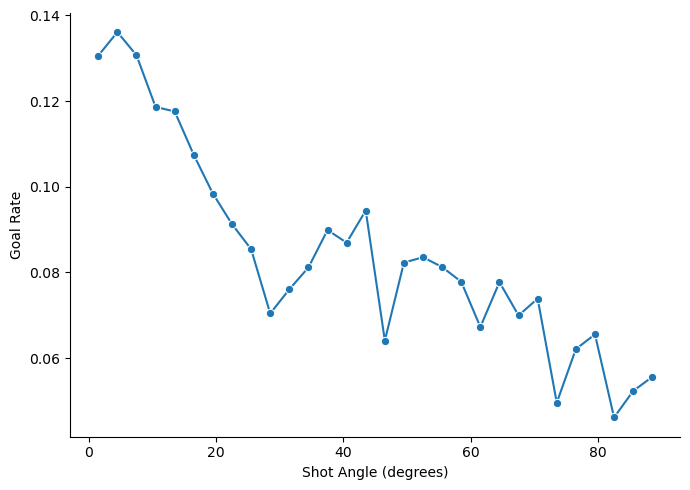

In [8]:
def goalrate_angle(df, bins=30):
    path_figures = "../figures/milestone2/feature_engineering/"
    os.makedirs(path_figures, exist_ok=True)
    df["angle_bin"] = pd.cut(df["shot_angle"], bins=bins)
    goal_rate = (
        df.groupby("angle_bin", observed=False)["is_goal"]
        .mean()
        .reset_index()
    )
    goal_rate["angle_center"] = goal_rate["angle_bin"].apply(lambda x: x.mid)
    g = sns.relplot(
        data=goal_rate,
        x="angle_center",
        y="is_goal",
        kind="line",
        marker="o",
        height=5,
        aspect=1.4
    )
    g.set_axis_labels("Shot Angle (degrees)", "Goal Rate")
    g.set_titles("Goal Rate vs Shot Angle")
    g.fig.tight_layout()
    plt.show()
    buffer = BytesIO()
    g.fig.savefig(buffer, format="png", bbox_inches="tight")
    buffer.seek(0)
    img_base64 = base64.b64encode(buffer.read()).decode("utf-8")
    html_path = os.path.join(path_figures, "goalrate_angle.html")
    with open(html_path, "w") as f:
        f.write(f'<img src="data:image/png;base64,{img_base64}">')
    plt.close(g.fig)
goalrate_angle(df,30)

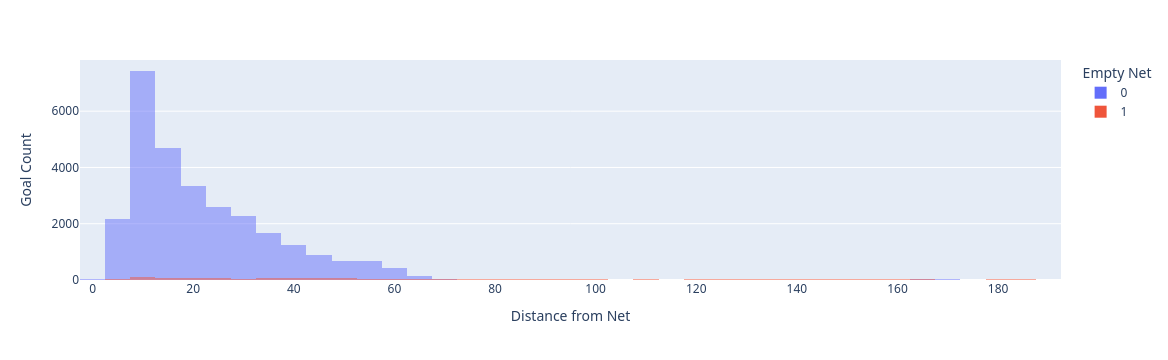

In [9]:
def goals_distance(df, bins=30):
    path_figures = "../figures/milestone2/feature_engineering/"
    os.makedirs(path_figures, exist_ok=True)

    goals = df[df["is_goal"] == 1]
    fig = px.histogram(
        goals,
        x="distance_from_net",
        color="empty_net",
        nbins=bins,
        barmode="overlay",
    )
    fig.update_layout(
        xaxis_title="Distance from Net",
        yaxis_title="Goal Count",
        legend_title_text="Empty Net"
    )
    fig.show()
    html_path = os.path.join(path_figures, "goals_distance.html")
    fig.write_html(html_path, include_plotlyjs="cdn", full_html=True)
goals_distance(df,60)

In [86]:
df = pd.read_csv("../data/tidy/all_seasons_combined.csv")
df["empty_net"].sum()

np.int64(0)

In [6]:
df["empty_net"] = df["goalie_name"].isna()
df["empty_net"].sum()

np.int64(3208)

In [10]:
df = pd.read_csv("../data/milestone2/advanced_train.csv")
empty_net_goals = df[(df["empty_net"]==True) & (df["is_goal"]==1)].shape[0]
guarded_net_goals = df[(df["empty_net"]==False) & (df["is_goal"]==1)].shape[0]
print(f"""
Goals on empty nets : {empty_net_goals}
Goals on guarded nets : {guarded_net_goals}
""")


Goals on empty nets : 1448
Goals on guarded nets : 28457

